## Task: Predict the price of the laptop

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle

In [2]:
Laptop_data = pd.read_csv('Laptop_Price.csv')
Laptop_data.sample(5)

,id,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
634,634,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,8GB,1TB HDD,Intel HD Graphics 500,Windows 10,2kg,21258.72
1002,1002,Dell,Notebook,15.6,1366x768,Intel Core i3 7100U 2.4GHz,4GB,128GB SSD,Intel HD Graphics 620,Windows 10,2.18kg,29144.16
648,648,Toshiba,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.2kg,64628.64
947,947,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 920MX,No OS,2.2kg,36496.80
131,131,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4GB,1TB HDD,AMD Radeon R5 M430,Windows 10,2.2kg,23922.72


## EDA

In [3]:
Laptop_data.shape

(1303, 12)

In [4]:
Laptop_data.dtypes

id                    int64
Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price               float64
dtype: object

In [5]:
Laptop_data.isnull().sum()

id                  0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [6]:
Laptop_data.describe()

,id,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [7]:
Laptop_data.duplicated().sum()

0

In [8]:
Laptop_data.corr()['Price']

id        0.067984
Inches    0.068197
Price     1.000000
Name: Price, dtype: float64

In [9]:
Categorical_features = ['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys']
Numerical_features = ['Inches', 'Weight', 'Price']

### Univariate analysis

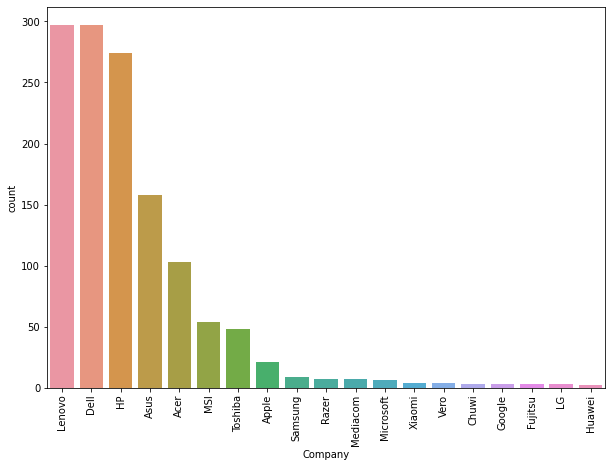

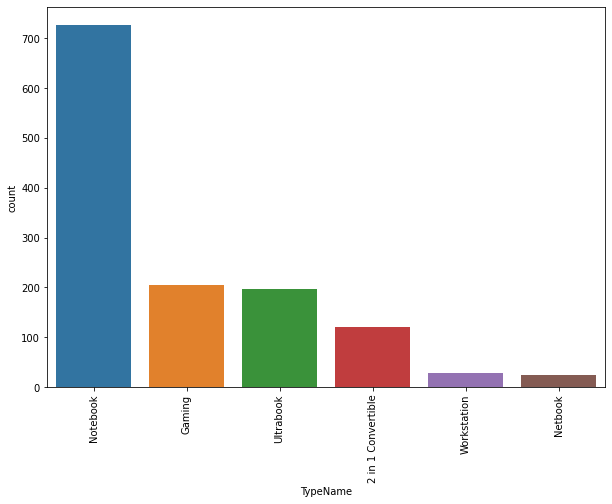

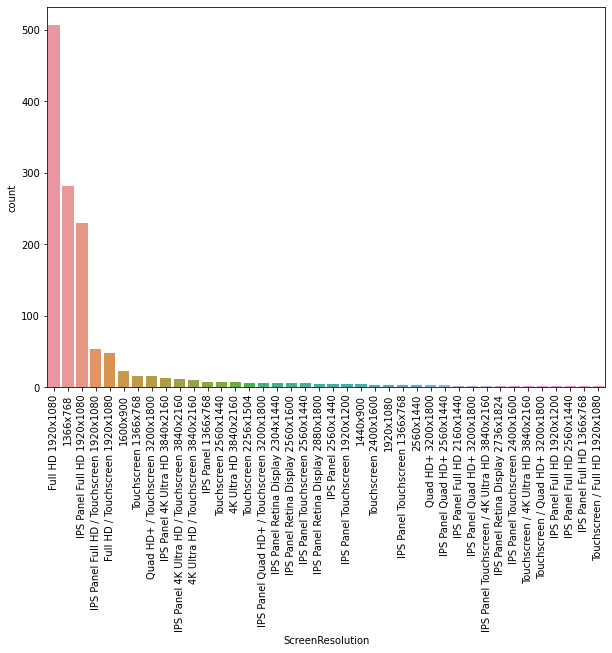

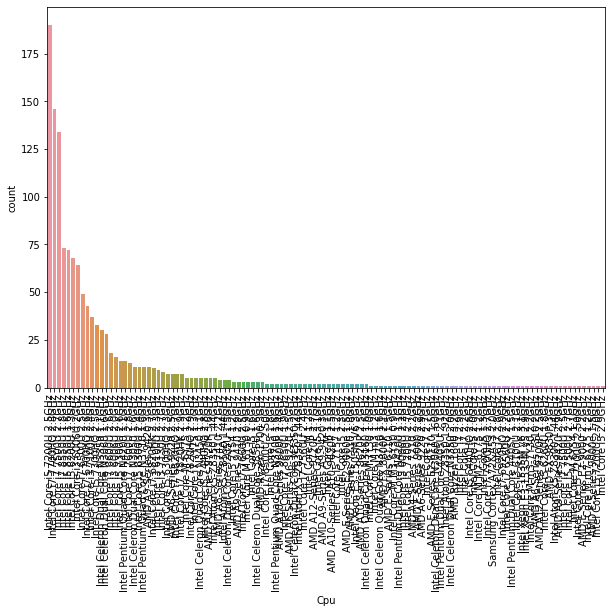

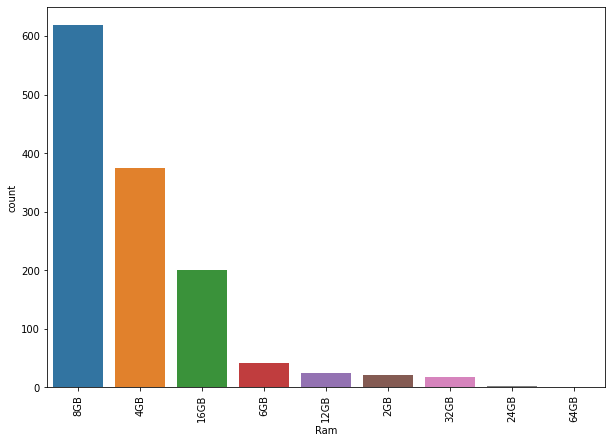

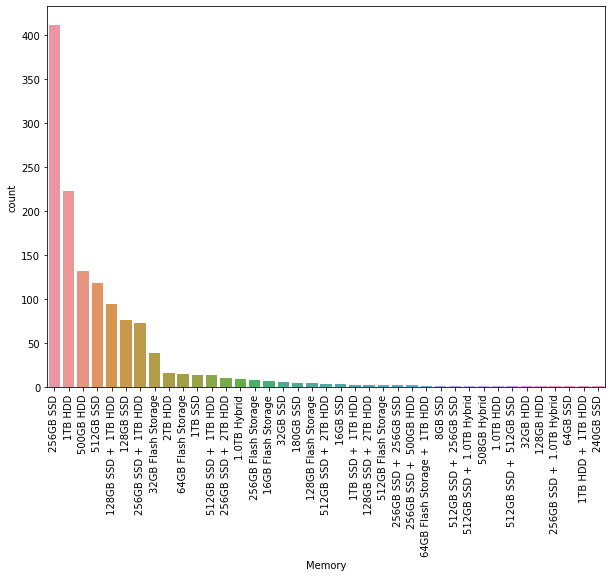

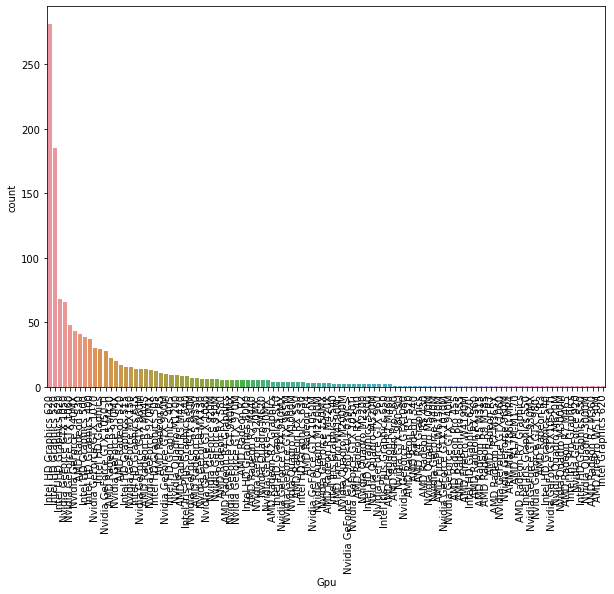

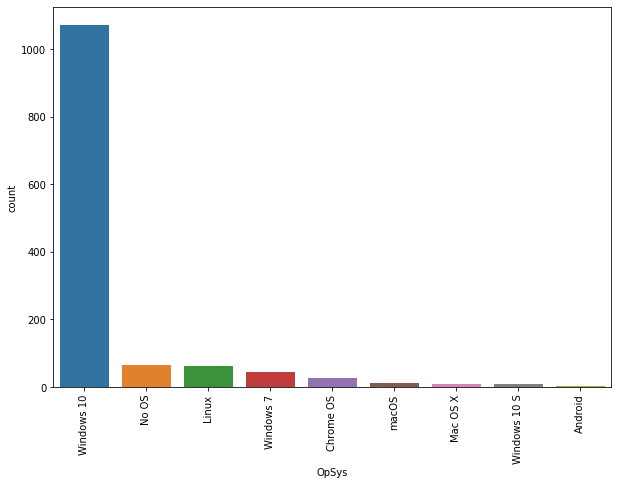

In [10]:
for feat in Categorical_features:
    plt.figure(figsize=(10,7))
    plt.xticks(rotation=90)
    sns.countplot(data=Laptop_data, x=feat, order=Laptop_data[feat].value_counts().index)

(array([  4.,  34.,  50., 166., 210.,   4., 669.,   0., 165.,   1.]),
 array([10.1 , 10.93, 11.76, 12.59, 13.42, 14.25, 15.08, 15.91, 16.74,
        17.57, 18.4 ]),
 <BarContainer object of 10 artists>)

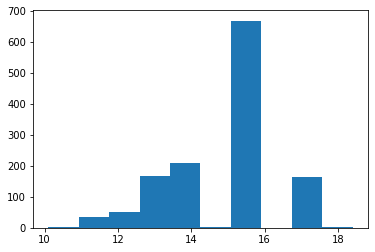

In [11]:
plt.hist(data=Laptop_data, x='Inches')

<AxesSubplot:xlabel='Inches'>

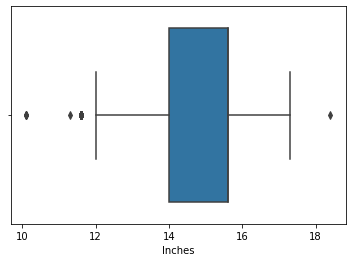

In [12]:
sns.boxplot(data=Laptop_data, x='Inches')

(array([474., 448., 231.,  98.,  37.,   8.,   3.,   2.,   1.,   1.]),
 array([  9270.72,  40839.12,  72407.52, 103975.92, 135544.32, 167112.72,
        198681.12, 230249.52, 261817.92, 293386.32, 324954.72]),
 <BarContainer object of 10 artists>)

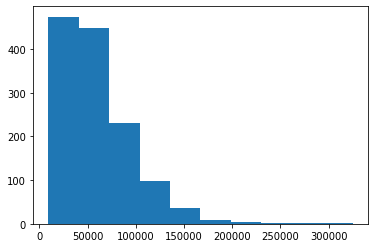

In [13]:
plt.hist(data=Laptop_data, x='Price')

<AxesSubplot:xlabel='Price'>

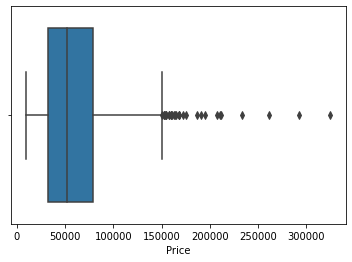

In [14]:
sns.boxplot(data=Laptop_data, x='Price')

### Multivariate analysis

<AxesSubplot:xlabel='Company', ylabel='Price'>

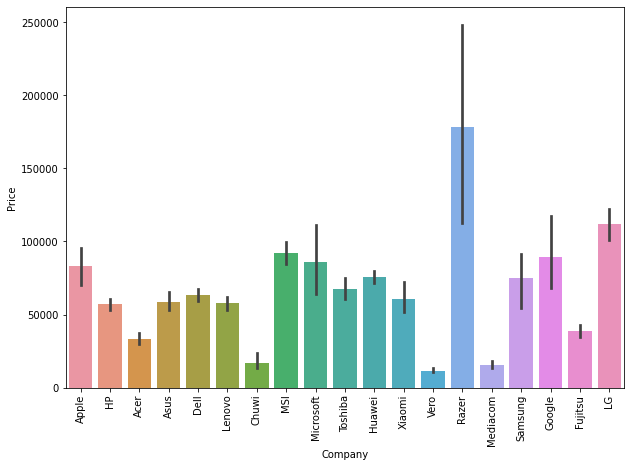

In [15]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=Laptop_data, x='Company', y='Price')

<AxesSubplot:xlabel='TypeName', ylabel='Price'>

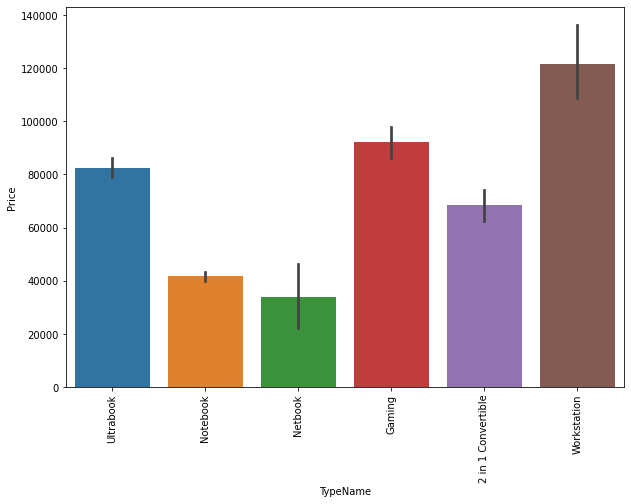

In [16]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=Laptop_data, x='TypeName', y='Price')

<AxesSubplot:xlabel='Ram', ylabel='Price'>

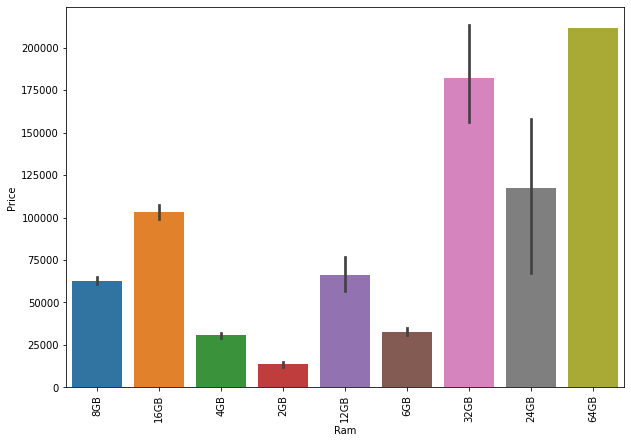

In [17]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=Laptop_data, x='Ram', y='Price')

<AxesSubplot:xlabel='OpSys', ylabel='Price'>

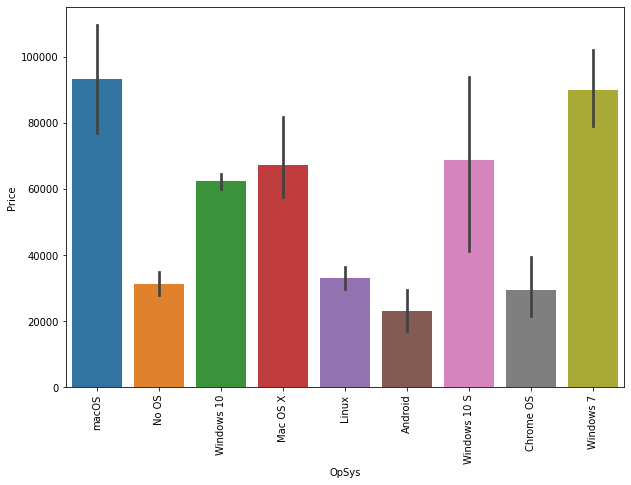

In [18]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=Laptop_data, x='OpSys', y='Price')

### Automatic EDA

In [19]:
import pandas as pd
from pandas_profiling import ProfileReport

In [20]:
profile = ProfileReport(Laptop_data, explorative=True)
profile.to_file('Laptop_Automatic_EDA.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Handling numerical data

In [21]:
# 'id' column is of no use, we can drop it.

Laptop_data.drop(columns='id', axis=1, inplace=True)

In [22]:
# 'Weight' is numerical data with numerical + textual content. We have to just remove the 'kg' from each record.

Laptop_data['Weight'] = Laptop_data['Weight'].str.strip('kg')
Laptop_data['Weight'] = Laptop_data['Weight'].astype('float32')
Laptop_data['Weight'].sample(5)

806     2.10
1010    2.65
1255    2.00
541     1.60
623     2.20
Name: Weight, dtype: float32

## Handling Categorical data
### 'Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys'

### Company

In [23]:
Company_count = Laptop_data['Company'].value_counts()
Company_count

Lenovo       297
Dell         297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

In [24]:
Other_companies = Company_count[Company_count<10].index
Other_companies

Index(['Samsung', 'Razer', 'Mediacom', 'Microsoft', 'Xiaomi', 'Vero', 'Chuwi',
       'Google', 'Fujitsu', 'LG', 'Huawei'],
      dtype='object')

In [25]:
Laptop_data['Company'] = Laptop_data['Company'].replace(Other_companies, 'Other')
Laptop_data['Company'].value_counts()

Dell       297
Lenovo     297
HP         274
Asus       158
Acer       103
MSI         54
Other       51
Toshiba     48
Apple       21
Name: Company, dtype: int64

### TypeName

In [26]:
Laptop_data['TypeName'].value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

### ScreenResolution

In [27]:
Laptop_data['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
Touchscreen 2256x1504                              6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Touchscreen 2560x1440               

The 'ScreenResolution' column contains lot of information regarding the screen of the laptop ie its <b>resolution</b>, <b>Panel type</b>, <b>touchscreen or not</b>.
We create seperate column for each of this attribute of the screen. Attributes are as follows,
1. Full HD
2. IPS Panel
3. Touchscreen
4. Quad HD+
5. 4K Ultra HD
6. Retina Display

In [28]:
# 1. IPS Panel
Laptop_data['IPS'] = Laptop_data['ScreenResolution'].apply(lambda x: 1 if 'IPS Panel' in x else 0)

# 2. Touchscreen
Laptop_data['Touchscreen'] = Laptop_data['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

# 3. Full HD
Laptop_data['FHD'] = Laptop_data['ScreenResolution'].apply(lambda x: 1 if 'Full HD' in x else 0)

# 4. Quad HD+
Laptop_data['QHD'] = Laptop_data['ScreenResolution'].apply(lambda x: 1 if 'Quad HD+' in x else 0)

# 5. 4K Ultra HD
Laptop_data['4KUHD'] = Laptop_data['ScreenResolution'].apply(lambda x: 1 if '4K Ultra HD' in x else 0)

# 6. Full HD
Laptop_data['Retina Display'] = Laptop_data['ScreenResolution'].apply(lambda x: 1 if 'Retina Display' in x else 0)

In [29]:
Laptop_data[['ScreenResolution','FHD','IPS','Touchscreen','QHD','4KUHD','Retina Display']].sample(5)

,ScreenResolution,FHD,IPS,Touchscreen,QHD,4KUHD,Retina Display
890,Full HD 1920x1080,1,0,0,0,0,0
911,4K Ultra HD / Touchscreen 3840x2160,0,0,1,0,1,0
529,Full HD 1920x1080,1,0,0,0,0,0
924,IPS Panel Full HD / Touchscreen 1920x1080,1,1,1,0,0,0
1127,1366x768,0,0,0,0,0,0


In [30]:
Laptop_data[(Laptop_data['IPS'] == 1) & (Laptop_data['FHD'] == 1)]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,FHD,QHD,4KUHD,Retina Display
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.60,1,0,1,0,0,0
19,Dell,Ultrabook,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,128GB SSD,Intel UHD Graphics 620,Windows 10,1.22,52161.12,1,1,1,0,0,0
21,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.50,53226.72,1,0,1,0,0,0
37,Dell,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.80,52161.12,1,0,1,0,0,0
41,Dell,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.65,79866.72,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,47898.72,1,0,1,0,0,0
1284,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.64,1,1,1,0,0,0
1289,Asus,Ultrabook,13.3,IPS Panel Full HD 1920x1080,Intel Core M 6Y30 0.9GHz,8GB,512GB SSD,Intel HD Graphics 515,Windows 10,1.20,38841.12,1,0,1,0,0,0
1293,Lenovo,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8GB,1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,47898.72,1,0,1,0,0,0


#### We will create a new columns which contains the just resolution terms.

In [31]:
def extract_resolution(x):
    a = re.findall(r'\d+x\d+',x)[0]
#     b = a.split('x')
#     return pd.Series([a, int(b[0]), int(b[1])])
    return a

In [32]:
# Laptop_data[['Just_Res', 'X_Resolution', 'Y_Resolution']] = Laptop_data['ScreenResolution'].apply(extract_resolution)
Laptop_data['Resolution'] = Laptop_data['ScreenResolution'].apply(extract_resolution)

In [33]:
Laptop_data[['ScreenResolution', 'Resolution']].sample(10)

,ScreenResolution,Resolution
74,1366x768,1366x768
1119,Full HD 1920x1080,1920x1080
1059,Full HD 1920x1080,1920x1080
1031,1366x768,1366x768
1246,1366x768,1366x768
207,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,3840x2160
579,Full HD 1920x1080,1920x1080
906,Full HD 1920x1080,1920x1080
1123,1366x768,1366x768
531,IPS Panel Full HD 1920x1080,1920x1080


<AxesSubplot:xlabel='Resolution', ylabel='Price'>

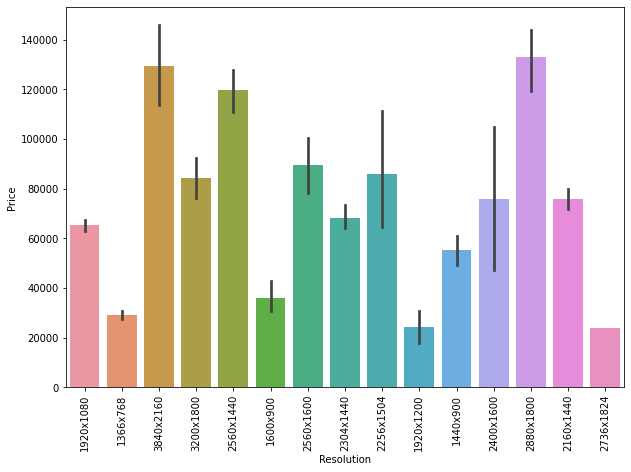

In [34]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(x='Resolution', y='Price', data=Laptop_data, order= Laptop_data['Resolution'].value_counts().index)

In [35]:
# Pickle the Resolution categories

pickle.dump(Laptop_data['Resolution'].unique().tolist(), open('Resolution_catg.pkl','wb'))

In [36]:
# Droping the original 'ScreenResolution'
Laptop_data.drop(columns=['ScreenResolution'], axis=1, inplace=True)
Laptop_data.head(1)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,FHD,QHD,4KUHD,Retina Display,Resolution
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,0,0,0,1,2560x1600


### Cpu

In [37]:
Cpu_count = Laptop_data['Cpu'].value_counts()
Cpu_count.values

array([190, 146, 134,  73,  72,  68,  64,  49,  43,  37,  33,  30,  28,
        18,  16,  14,  14,  13,  11,  11,  11,  11,  10,   9,   8,   7,
         7,   7,   7,   5,   5,   5,   5,   5,   5,   5,   4,   4,   4,
         3,   3,   3,   3,   3,   3,   3,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1], dtype=int64)

In [38]:
Cpu_count[Cpu_count > 30].index

Index(['Intel Core i5 7200U 2.5GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i5 6200U 2.3GHz',
       'Intel Core i3 6006U 2GHz', 'Intel Core i7 6500U 2.5GHz',
       'Intel Core i7 6700HQ 2.6GHz', 'Intel Core i3 7100U 2.4GHz',
       'Intel Core i5 7300HQ 2.5GHz'],
      dtype='object')

In [39]:
Cpu_least_catg = Cpu_count[Cpu_count <= 30].index.tolist()
Cpu_least_catg

['Intel Celeron Dual Core N3350 1.1GHz',
 'Intel Celeron Dual Core N3060 1.6GHz',
 'Intel Core i7 6600U 2.6GHz',
 'Intel Core i3 6006U 2.0GHz',
 'Intel Core i5 7300U 2.6GHz',
 'Intel Pentium Quad Core N4200 1.1GHz',
 'Intel Core i7 7600U 2.8GHz',
 'Intel Celeron Dual Core N3050 1.6GHz',
 'Intel Core i5 6300U 2.4GHz',
 'Intel Pentium Quad Core N3710 1.6GHz',
 'AMD A9-Series 9420 3GHz',
 'Intel Core i7 6820HK 2.7GHz',
 'Intel Core i3 6100U 2.3GHz',
 'Intel Core i3 7130U 2.7GHz',
 'Intel Core i5 6300HQ 2.3GHz',
 'AMD A6-Series 9220 2.5GHz',
 'Intel Core i7 6820HQ 2.7GHz',
 'Intel Core i7 7820HK 2.9GHz',
 'Intel Core M 6Y75 1.2GHz',
 'Intel Core i7 7820HQ 2.9GHz',
 'Intel Core i7 7Y75 1.3GHz',
 'Intel Celeron Quad Core N3450 1.1GHz',
 'Intel Core i5 7440HQ 2.8GHz',
 'AMD A12-Series 9720P 3.6GHz',
 'Intel Atom x5-Z8350 1.44GHz',
 'AMD A8-Series 7410 2.2GHz',
 'Intel Atom x5-Z8550 1.44GHz',
 'Intel Celeron Dual Core 3205U 1.5GHz',
 'Intel Core i5 7Y54 1.2GHz',
 'AMD A9-Series 9410 2.9GHz',
 

In [40]:
# Laptop_data['Cpu'] = Laptop_data['Cpu'].replace(other_Cpu,'Other')
# Laptop_data['Cpu'].value_counts()

Cpu_Intel_least_list = [cpu for cpu in Cpu_least_catg if 'Intel' in cpu]
Cpu_AMD_least_list = [cpu for cpu in Cpu_least_catg if 'AMD' in cpu]

In [41]:
Cpu_Intel_least_list

['Intel Celeron Dual Core N3350 1.1GHz',
 'Intel Celeron Dual Core N3060 1.6GHz',
 'Intel Core i7 6600U 2.6GHz',
 'Intel Core i3 6006U 2.0GHz',
 'Intel Core i5 7300U 2.6GHz',
 'Intel Pentium Quad Core N4200 1.1GHz',
 'Intel Core i7 7600U 2.8GHz',
 'Intel Celeron Dual Core N3050 1.6GHz',
 'Intel Core i5 6300U 2.4GHz',
 'Intel Pentium Quad Core N3710 1.6GHz',
 'Intel Core i7 6820HK 2.7GHz',
 'Intel Core i3 6100U 2.3GHz',
 'Intel Core i3 7130U 2.7GHz',
 'Intel Core i5 6300HQ 2.3GHz',
 'Intel Core i7 6820HQ 2.7GHz',
 'Intel Core i7 7820HK 2.9GHz',
 'Intel Core M 6Y75 1.2GHz',
 'Intel Core i7 7820HQ 2.9GHz',
 'Intel Core i7 7Y75 1.3GHz',
 'Intel Celeron Quad Core N3450 1.1GHz',
 'Intel Core i5 7440HQ 2.8GHz',
 'Intel Atom x5-Z8350 1.44GHz',
 'Intel Atom x5-Z8550 1.44GHz',
 'Intel Celeron Dual Core 3205U 1.5GHz',
 'Intel Core i5 7Y54 1.2GHz',
 'Intel Core i7 7660U 2.5GHz',
 'Intel Core M 6Y30 0.9GHz',
 'Intel Core i5 1.6GHz',
 'Intel Celeron Dual Core 3855U 1.6GHz',
 'Intel Core i7 6500U 2.5

In [42]:
Cpu_AMD_least_list

['AMD A9-Series 9420 3GHz',
 'AMD A6-Series 9220 2.5GHz',
 'AMD A12-Series 9720P 3.6GHz',
 'AMD A8-Series 7410 2.2GHz',
 'AMD A9-Series 9410 2.9GHz',
 'AMD Ryzen 1700 3GHz',
 'AMD A10-Series 9600P 2.4GHz',
 'AMD A6-Series A6-9220 2.5GHz',
 'AMD A12-Series 9720P 2.7GHz',
 'AMD A9-Series A9-9420 3GHz',
 'AMD A10-Series A10-9620P 2.5GHz',
 'AMD E-Series E2-9000e 1.5GHz',
 'AMD E-Series 7110 1.8GHz',
 'AMD A10-Series 9620P 2.5GHz',
 'AMD FX 8800P 2.1GHz',
 'AMD E-Series 6110 1.5GHz',
 'AMD A4-Series 7210 2.2GHz',
 'AMD E-Series 9000 2.2GHz',
 'AMD A6-Series 9220 2.9GHz',
 'AMD E-Series E2-6110 1.5GHz',
 'AMD Ryzen 1600 3.2GHz',
 'AMD A6-Series 7310 2GHz',
 'AMD A12-Series 9700P 2.5GHz',
 'AMD FX 9830P 3GHz',
 'AMD A9-Series 9420 2.9GHz',
 'AMD E-Series E2-9000 2.2GHz',
 'AMD E-Series 9000e 1.5GHz']

In [43]:
Laptop_data['Cpu'] = Laptop_data['Cpu'].replace(Cpu_Intel_least_list, 'Intel other CPU')
Laptop_data['Cpu'] = Laptop_data['Cpu'].replace(Cpu_AMD_least_list, 'AMD')

<AxesSubplot:xlabel='Cpu', ylabel='Price'>

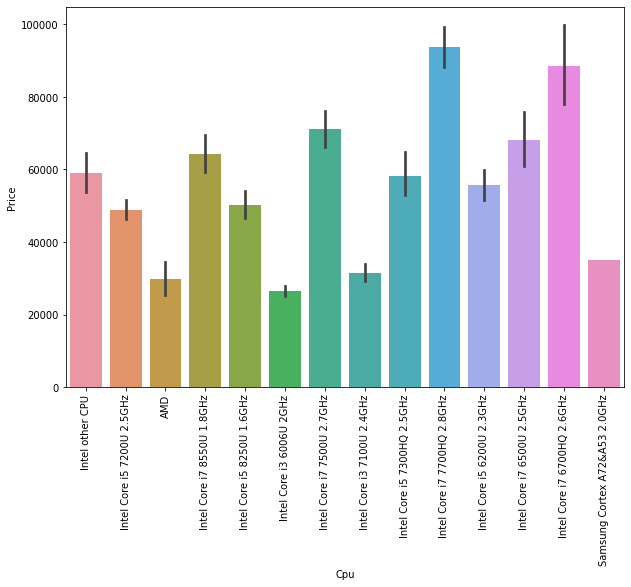

In [44]:
plt.figure(figsize=(10,7))
plt.xticks(rotation=90)
sns.barplot(data=Laptop_data, x='Cpu', y='Price')

In [45]:
I3 = ['i3 6006U', 'i3 7100U']
I5_1 = ['i5 7200U', 'i5 8250U']
I5_2 = ['i5 7300HQ', 'i5 6200U']
I7_1 = ['i7 8550U', 'i7 7500U', 'i7 6500U']
I7_2 = ['i7 7700HQ', 'i7 6700HQ']

I3_idx = Laptop_data[Laptop_data['Cpu'].str.contains("|".join(I3))].index
I5_1_idx = Laptop_data[Laptop_data['Cpu'].str.contains("|".join(I5_1))].index
I5_2_idx = Laptop_data[Laptop_data['Cpu'].str.contains("|".join(I5_2))].index
I7_1_idx = Laptop_data[Laptop_data['Cpu'].str.contains("|".join(I7_1))].index
I7_2_idx = Laptop_data[Laptop_data['Cpu'].str.contains("|".join(I7_2))].index

Laptop_data.at[I3_idx,'Cpu'] = 'Intel I3'
Laptop_data.at[I5_1_idx,'Cpu'] = 'Intel I5 Basic'
Laptop_data.at[I5_2_idx,'Cpu'] = 'Intel I5 Premium'
Laptop_data.at[I7_1_idx,'Cpu'] = 'Intel I7 Basic'
Laptop_data.at[I7_2_idx,'Cpu'] = 'Intel I7 Premium'

In [46]:
Laptop_data['Cpu'].value_counts()

Intel other CPU                  331
Intel I5 Basic                   262
Intel I7 Basic                   256
Intel I7 Premium                 189
Intel I3                         101
Intel I5 Premium                 101
AMD                               62
Samsung Cortex A72&A53 2.0GHz      1
Name: Cpu, dtype: int64

In [47]:
Laptop_data[Laptop_data['Cpu'] == 'Samsung Cortex A72&A53 2.0GHz']

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,FHD,QHD,4KUHD,Retina Display,Resolution
1191,Other,2 in 1 Convertible,12.3,Samsung Cortex A72&A53 2.0GHz,4GB,32GB Flash Storage,ARM Mali T860 MP4,Chrome OS,1.15,35111.52,1,1,0,0,0,0,2400x1600


In [48]:
# Gpu 'Samsung Cortex A72&A53 2.0GHz' present in only 1 record so we will drop it.

Laptop_data.drop(Laptop_data[Laptop_data['Cpu'] == 'Samsung Cortex A72&A53 2.0GHz'].index, inplace=True)
Laptop_data['Cpu'].value_counts()

Intel other CPU     331
Intel I5 Basic      262
Intel I7 Basic      256
Intel I7 Premium    189
Intel I3            101
Intel I5 Premium    101
AMD                  62
Name: Cpu, dtype: int64

### Ram

In [49]:
Laptop_data['Ram'].value_counts()

8GB     619
4GB     374
16GB    200
6GB      41
12GB     25
2GB      22
32GB     17
24GB      3
64GB      1
Name: Ram, dtype: int64

'Ram' is categorical data with numerical + textual content. <Br>We can simply remove the word 'GB' from each reacrd and keep the numerical content as it is.

In [50]:
Laptop_data['Ram'] = Laptop_data['Ram'].str.strip('GB')
Laptop_data['Ram'] = Laptop_data['Ram'].astype('int32')
Laptop_data['Ram'].value_counts()

8     619
4     374
16    200
6      41
12     25
2      22
32     17
24      3
64      1
Name: Ram, dtype: int64

### Memory

In [51]:
Laptop_data['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
512GB Flash Storage                2
256GB SSD +  256GB SSD             2
256GB SSD +  500GB HDD             2
64GB Flash Storage +  1TB HDD      1
8

In [52]:
def extract_memory(x):
    is_ssd = re.findall(r'\d\.*\d*[A-Za-z]* SSD', x)
    is_hdd = re.findall(r'\d\.*\d*[A-Za-z]* HDD', x)
    is_hybrid = re.findall(r'\d\.*\d*[A-Za-z]* Hybrid', x)
    is_flash = re.findall(r'\d\.*\d*[A-Za-z]* Flash Storage', x)

    if len(is_ssd)>0:
        ssd_vol = float(re.findall(r'\d\.*\d*',is_ssd[0])[0])
        if 'TB' in is_ssd[0]:
            ssd_vol = ssd_vol * 1024
    else:
        ssd_vol = 0.0


    if len(is_hdd)>0:
        hdd_vol = float(re.findall(r'\d\.*\d*',is_hdd[0])[0])
        if 'TB' in is_hdd[0]:
            hdd_vol = hdd_vol * 1024
    else:
        hdd_vol = 0.0

    if len(is_hybrid)>0:
        hybrid_vol = float(re.findall(r'\d\.*\d*',is_hybrid[0])[0])
        if 'TB' in is_hybrid[0]:
            hybrid_vol = hybrid_vol * 1024
    else:
        hybrid_vol = 0.0
        
    if len(is_flash)>0:
        flash_vol = float(re.findall(r'\d\.*\d*',is_flash[0])[0])
        if 'TB' in is_flash[0]:
            flash_vol = flash_vol * 1024
    else:
        flash_vol = 0.0
    
    return pd.Series([ssd_vol, hdd_vol, hybrid_vol,flash_vol])

In [53]:
Laptop_data[['SSD','HDD','Hybrid','Flash']] = Laptop_data['Memory'].apply(extract_memory)

In [54]:
Laptop_data[['Memory','SSD','HDD','Hybrid','Flash']].sample(10)

,Memory,SSD,HDD,Hybrid,Flash
563,256GB SSD,256.0,0.0,0.0,0.0
500,64GB Flash Storage,0.0,0.0,0.0,64.0
198,256GB SSD + 1TB HDD,256.0,1024.0,0.0,0.0
163,256GB SSD,256.0,0.0,0.0,0.0
147,1TB HDD,0.0,1024.0,0.0,0.0
1213,256GB SSD,256.0,0.0,0.0,0.0
1176,1.0TB Hybrid,0.0,0.0,1024.0,0.0
718,32GB HDD,0.0,32.0,0.0,0.0
226,1TB HDD,0.0,1024.0,0.0,0.0
626,32GB Flash Storage,0.0,0.0,0.0,32.0


In [55]:
# We can drop the 'Memory' column as we have created other columns using 'Memory' data

Laptop_data.drop(columns='Memory', axis=1, inplace=True)

### Gpu

In [56]:
Gpu_count = Laptop_data['Gpu'].value_counts()
Gpu_count

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro 3000M          1
Intel HD Graphics 530        1
AMD Radeon R7 M360           1
AMD Radeon R7                1
Intel Graphics 620           1
Name: Gpu, Length: 109, dtype: int64

In [57]:
Gpu_count.values

array([281, 185,  68,  66,  48,  43,  41,  39,  37,  30,  29,  28,  22,
        20,  17,  15,  15,  14,  14,  14,  13,  12,  11,  10,   9,   9,
         8,   8,   7,   7,   6,   6,   6,   6,   5,   5,   5,   5,   5,
         5,   5,   5,   5,   5,   4,   4,   4,   4,   4,   4,   4,   3,
         3,   3,   3,   3,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1], dtype=int64)

In [58]:
Gpu_least_catg = Gpu_count[Gpu_count <= 15].index.tolist()
Gpu_least_catg

['Intel HD Graphics 515',
 'Nvidia GeForce MX150',
 'Nvidia GeForce GTX 960M',
 'Intel HD Graphics 615',
 'AMD Radeon R7 M445',
 'Nvidia GeForce 920MX',
 'Intel HD Graphics 505',
 'AMD Radeon R5',
 'Nvidia GeForce GTX 980M',
 'Intel HD Graphics 405',
 'Nvidia Quadro M1200',
 'AMD Radeon R5 M420',
 'Intel Iris Plus Graphics 640',
 'Nvidia GeForce GTX 950M',
 'AMD Radeon R5 M330',
 'Nvidia GeForce 920M',
 'Nvidia GeForce GTX 1080',
 'Nvidia GeForce MX130',
 'Nvidia GeForce 930M',
 'AMD Radeon R2',
 'Nvidia GeForce 920MX ',
 'Nvidia GeForce GTX 970M',
 'Nvidia GeForce GT 940MX',
 'Nvidia Quadro M620',
 'Intel HD Graphics 6000',
 'AMD Radeon RX 580',
 'AMD Radeon R7 M440',
 'AMD Radeon R4 Graphics',
 'Nvidia GeForce 930MX ',
 'Intel HD Graphics 630',
 'AMD Radeon R2 Graphics',
 'AMD Radeon RX 550',
 'Intel HD Graphics 510',
 'Nvidia Quadro M1000M',
 'Nvidia GeForce GTX 940MX',
 'Nvidia GeForce GTX 965M',
 'Nvidia Quadro M2200M',
 'AMD Radeon R4',
 'Nvidia GeForce 150MX',
 'Nvidia GeForce G

In [59]:
Intel_least_list = [gpu for gpu in Gpu_least_catg if 'Intel' in gpu]
Nvidia_least_list = [gpu for gpu in Gpu_least_catg if 'Nvidia' in gpu]
AMD_least_list = [gpu for gpu in Gpu_least_catg if 'AMD' in gpu]

In [60]:
Intel_least_list

['Intel HD Graphics 515',
 'Intel HD Graphics 615',
 'Intel HD Graphics 505',
 'Intel HD Graphics 405',
 'Intel Iris Plus Graphics 640',
 'Intel HD Graphics 6000',
 'Intel HD Graphics 630',
 'Intel HD Graphics 510',
 'Intel Iris Graphics 540',
 'Intel HD Graphics 5300',
 'Intel Iris Plus Graphics 650',
 'Intel HD Graphics 620 ',
 'Intel Iris Graphics 550',
 'Intel HD Graphics 540',
 'Intel Iris Pro Graphics',
 'Intel HD Graphics 530',
 'Intel Graphics 620']

In [61]:
Nvidia_least_list

['Nvidia GeForce MX150',
 'Nvidia GeForce GTX 960M',
 'Nvidia GeForce 920MX',
 'Nvidia GeForce GTX 980M',
 'Nvidia Quadro M1200',
 'Nvidia GeForce GTX 950M',
 'Nvidia GeForce 920M',
 'Nvidia GeForce GTX 1080',
 'Nvidia GeForce MX130',
 'Nvidia GeForce 930M',
 'Nvidia GeForce 920MX ',
 'Nvidia GeForce GTX 970M',
 'Nvidia GeForce GT 940MX',
 'Nvidia Quadro M620',
 'Nvidia GeForce 930MX ',
 'Nvidia Quadro M1000M',
 'Nvidia GeForce GTX 940MX',
 'Nvidia GeForce GTX 965M',
 'Nvidia Quadro M2200M',
 'Nvidia GeForce 150MX',
 'Nvidia GeForce GTX 1050M',
 'Nvidia GeForce GTX 960<U+039C>',
 'Nvidia Quadro M2000M',
 'Nvidia GeForce GTX 1050Ti',
 'Nvidia Quadro M2200',
 'Nvidia Quadro M520M',
 'Nvidia GeForce GTX 960',
 'Nvidia GeForce GTX1060',
 'Nvidia GTX 980 SLI',
 'Nvidia GeForce 940M',
 'Nvidia Quadro M500M',
 'Nvidia GeForce GTX 1070M',
 'Nvidia GeForce GTX 940M',
 'Nvidia GeForce GTX1080',
 'Nvidia GeForce 960M',
 'Nvidia GeForce GTX 980 ',
 'Nvidia GeForce GTX 930MX',
 'Nvidia GeForce GTX1

In [62]:
AMD_least_list

['AMD Radeon R7 M445',
 'AMD Radeon R5',
 'AMD Radeon R5 M420',
 'AMD Radeon R5 M330',
 'AMD Radeon R2',
 'AMD Radeon RX 580',
 'AMD Radeon R7 M440',
 'AMD Radeon R4 Graphics',
 'AMD Radeon R2 Graphics',
 'AMD Radeon RX 550',
 'AMD Radeon R4',
 'AMD Radeon R5 M420X',
 'AMD FirePro W4190M ',
 'AMD Radeon RX 540',
 'AMD Radeon R7 M460',
 'AMD FirePro W6150M',
 'AMD Radeon R5 520',
 'AMD R4 Graphics',
 'AMD Radeon R5 430',
 'AMD Radeon 540',
 'AMD Radeon R9 M385',
 'AMD Radeon Pro 455',
 'AMD Radeon Pro 555',
 'AMD FirePro W4190M',
 'AMD Radeon R5 M315',
 'AMD FirePro W5130M',
 'AMD Radeon R7 M365X',
 'AMD Radeon Pro 560',
 'AMD R17M-M1-70',
 'AMD Radeon RX 560',
 'AMD Radeon R7 Graphics',
 'AMD Radeon R3',
 'AMD Radeon R7 M465',
 'AMD Radeon R7 M360',
 'AMD Radeon R7']

In [63]:
Laptop_data['Gpu'] = Laptop_data['Gpu'].replace(Intel_least_list, 'Intel Other GPU')
Laptop_data['Gpu'] = Laptop_data['Gpu'].replace(Nvidia_least_list, 'Nvidia Other GPU')
Laptop_data['Gpu'] = Laptop_data['Gpu'].replace(AMD_least_list, 'AMD Other GPU')

In [64]:
Gpu_new_count = Laptop_data['Gpu'].value_counts()
Gpu_new_count

Intel HD Graphics 620         281
Intel HD Graphics 520         185
Nvidia Other GPU              165
AMD Other GPU                 100
Intel Other GPU                83
Intel UHD Graphics 620         68
Nvidia GeForce GTX 1050        66
Nvidia GeForce GTX 1060        48
Nvidia GeForce 940MX           43
AMD Radeon 530                 41
Intel HD Graphics 500          39
Intel HD Graphics 400          37
Nvidia GeForce GTX 1070        30
Intel HD Graphics              29
Nvidia GeForce GTX 1050 Ti     28
AMD Radeon R5 M430             22
Nvidia GeForce 930MX           20
AMD Radeon 520                 17
Name: Gpu, dtype: int64

In [65]:
Gpu_new_catg = Gpu_new_count.index.tolist()
Gpu_new_catg

['Intel HD Graphics 620',
 'Intel HD Graphics 520',
 'Nvidia Other GPU',
 'AMD Other GPU',
 'Intel Other GPU',
 'Intel UHD Graphics 620',
 'Nvidia GeForce GTX 1050',
 'Nvidia GeForce GTX 1060',
 'Nvidia GeForce 940MX',
 'AMD Radeon 530',
 'Intel HD Graphics 500',
 'Intel HD Graphics 400',
 'Nvidia GeForce GTX 1070',
 'Intel HD Graphics',
 'Nvidia GeForce GTX 1050 Ti',
 'AMD Radeon R5 M430',
 'Nvidia GeForce 930MX',
 'AMD Radeon 520']

In [66]:
Intel_list = [gpu for gpu in Gpu_new_catg if 'Intel' in gpu]
Nvidia_list = [gpu for gpu in Gpu_new_catg if 'Nvidia' in gpu]
AMD_list = [gpu for gpu in Gpu_new_catg if 'AMD' in gpu]

In [67]:
Intel_list

['Intel HD Graphics 620',
 'Intel HD Graphics 520',
 'Intel Other GPU',
 'Intel UHD Graphics 620',
 'Intel HD Graphics 500',
 'Intel HD Graphics 400',
 'Intel HD Graphics']

In [68]:
Nvidia_list

['Nvidia Other GPU',
 'Nvidia GeForce GTX 1050',
 'Nvidia GeForce GTX 1060',
 'Nvidia GeForce 940MX',
 'Nvidia GeForce GTX 1070',
 'Nvidia GeForce GTX 1050 Ti',
 'Nvidia GeForce 930MX']

In [69]:
AMD_list

['AMD Other GPU', 'AMD Radeon 530', 'AMD Radeon R5 M430', 'AMD Radeon 520']

### OpSys

In [70]:
Laptop_data['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [71]:
Laptop_data.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,Price,IPS,Touchscreen,FHD,QHD,4KUHD,Retina Display,Resolution,SSD,HDD,Hybrid,Flash
759,Acer,Notebook,15.6,Intel I5 Basic,4,Intel HD Graphics 620,Windows 10,2.10,31914.720,0,0,0,0,0,0,1366x768,256.0,0.0,0.0,0.0
938,Dell,Ultrabook,14.0,Intel I5 Basic,8,Intel HD Graphics 620,Windows 10,1.36,87325.920,0,0,1,0,0,0,1920x1080,256.0,0.0,0.0,0.0
192,Other,Ultrabook,13.3,Intel I5 Basic,8,Nvidia Other GPU,No OS,1.30,53274.672,1,0,1,0,0,0,1920x1080,256.0,0.0,0.0,0.0
704,Lenovo,Notebook,15.6,Intel I3,4,Intel HD Graphics 520,No OS,1.90,23976.000,0,0,0,0,0,0,1366x768,0.0,500.0,0.0,0.0
15,Apple,Ultrabook,13.3,Intel other CPU,8,Intel Other GPU,macOS,1.37,80908.344,1,0,0,0,0,1,2560x1600,256.0,0.0,0.0,0.0


In [72]:
Laptop_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1302
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Company         1302 non-null   object 
 1   TypeName        1302 non-null   object 
 2   Inches          1302 non-null   float64
 3   Cpu             1302 non-null   object 
 4   Ram             1302 non-null   int32  
 5   Gpu             1302 non-null   object 
 6   OpSys           1302 non-null   object 
 7   Weight          1302 non-null   float32
 8   Price           1302 non-null   float64
 9   IPS             1302 non-null   int64  
 10  Touchscreen     1302 non-null   int64  
 11  FHD             1302 non-null   int64  
 12  QHD             1302 non-null   int64  
 13  4KUHD           1302 non-null   int64  
 14  Retina Display  1302 non-null   int64  
 15  Resolution      1302 non-null   object 
 16  SSD             1302 non-null   float64
 17  HDD             1302 non-null   f

In [73]:
Laptop_data.corr()['Price']

Inches            0.067329
Ram               0.742905
Weight            0.209867
Price             1.000000
IPS               0.253320
Touchscreen       0.192917
FHD               0.198093
QHD               0.106584
4KUHD             0.343951
Retina Display    0.087852
SSD               0.675849
HDD              -0.094530
Hybrid            0.007963
Flash            -0.040067
Name: Price, dtype: float64

## Training

### Train test split

In [74]:
from sklearn.model_selection import train_test_split

# We will drop 'Hybrid' because it has very low corrolation with 'Price'
X = Laptop_data.drop(columns=['Price','Hybrid'], axis=1)
Y = Laptop_data['Price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

x_train.shape, x_test.shape

((1041, 18), (261, 18))

In [75]:
x_train.head(1)

,Company,TypeName,Inches,Cpu,Ram,Gpu,OpSys,Weight,IPS,Touchscreen,FHD,QHD,4KUHD,Retina Display,Resolution,SSD,HDD,Flash
1108,HP,Notebook,15.6,AMD,4,AMD Other GPU,Windows 10,2.1,0,0,1,0,0,0,1920x1080,0.0,1024.0,0.0


In [76]:
x_train.columns

Index(['Company', 'TypeName', 'Inches', 'Cpu', 'Ram', 'Gpu', 'OpSys', 'Weight',
       'IPS', 'Touchscreen', 'FHD', 'QHD', '4KUHD', 'Retina Display',
       'Resolution', 'SSD', 'HDD', 'Flash'],
      dtype='object')

### Final sequence of our columns, in this sequence only we have to take inputs from user
'Company' | 'TypeName' | 'Inches' | 'Cpu' | 'Ram' | 'Gpu' | 'OpSys' | 'Weight' | 'IPS' | 'Touchscreen' | 'FHD' | 'QHD' | '4KUHD' | 'Retina Display' | 'Resolution' | 'SSD' | 'HDD' | 'Flash'

In [77]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

### Column Transformation

In [78]:
featsIdx_to_OHE = [0, 1, 3, 5, 6, 14]

for idx in featsIdx_to_OHE:
    print(x_train.columns[idx],' : ', len(x_train.iloc[:,idx].value_counts().index))

Company  :  9
TypeName  :  6
Cpu  :  7
Gpu  :  18
OpSys  :  9
Resolution  :  15


In [79]:
# One hot Encoding on 'Company' , 'TypeName' , 'Cpu' , 'Gpu' , 'OpSys' 

ct1 = ColumnTransformer(transformers=[
    ('tf1', OneHotEncoder(sparse= False, drop='first'), featsIdx_to_OHE)
],remainder='passthrough')

In [80]:
# Scaling on all features

ct2 = ColumnTransformer(transformers=[
    ('tf1', StandardScaler(),list(range(0, 70)))
], remainder='passthrough')

In [81]:
# Model building

model_LR = LinearRegression()

## Pipeline creation 

In [82]:
from sklearn.pipeline import Pipeline

In [83]:
pipe = Pipeline([
    ('OHE', ct1),
    ('Scale', ct2),
    ('Training', model_LR)
])

In [84]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('OHE',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 3, 5, 6, 14])])),
                ('Scale',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1', StandardScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, ...])])),
                ('Training', LinearRegression())])

In [85]:
y_train_pred = pipe.predict(x_train)
y_test_pred = pipe.predict(x_test)

### Performance

In [86]:
print('Training r2 score: ', r2_score(y_train.values, y_train_pred) * 100)
print('Testing r2 score: ', r2_score(y_test, y_test_pred) * 100)

print('Training MAE: ', mean_absolute_error(y_train, y_train_pred))
print('Testing MAE: ', mean_absolute_error(y_test, y_test_pred))

Training r2 score:  82.22606706342235
Testing r2 score:  77.94649762556394
Training MAE:  10704.734625454588
Testing MAE:  12668.887575009414


In [87]:
pd.DataFrame({'Actual':y_test, 'Predicted':y_test_pred}).sample(10)

,Actual,Predicted
542,61005.60,83910.866880
213,29250.72,48436.916278
648,64628.64,64450.866880
1150,18061.92,24313.642939
815,99047.52,71087.866880
411,103523.04,132221.866880
935,88924.32,63245.866880
747,28717.92,49884.866880
109,78854.40,57702.866880
370,58554.72,80374.418998


### Random forest 

In [88]:
from sklearn.ensemble import RandomForestRegressor

model_RF = RandomForestRegressor(n_estimators=100,
                              random_state=5,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

In [89]:
pipe2 = Pipeline([
    ('OHE', ct1),
    ('Scale', ct2),
    ('Training', model_RF)
])

In [90]:
pipe2.fit(x_train, y_train)

Pipeline(steps=[('OHE',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  [0, 1, 3, 5, 6, 14])])),
                ('Scale',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1', StandardScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, ...])])),
                ('Training',
                 RandomForestRegressor(max_depth=15, max_features=0.75,
                                       ma

In [91]:
y_train_pred = pipe2.predict(x_train)
y_test_pred = pipe2.predict(x_test)

In [92]:
print('Training r2 score: ', r2_score(y_train.values, y_train_pred) * 100)
print('Testing r2 score: ', r2_score(y_test, y_test_pred) * 100)

Training r2 score:  94.07329214620385
Testing r2 score:  79.08369432760057


## Exporting model and data set

In [104]:
pickle.dump(x_train, open('Train_data.pkl','wb'))
pickle.dump(pipe2, open('pipeline.pkl','wb'))

### Development testing

In [94]:
data_dev = pickle.load(open('Train_data.pkl','rb'))
pipeline = pickle.load(open('pipeline.pkl','rb'))

In [126]:
x_test.iloc[1]

Company                               HP
TypeName                        Notebook
Inches                              15.6
Cpu                       Intel I5 Basic
Ram                                    8
Gpu               Intel UHD Graphics 620
OpSys                         Windows 10
Weight                               2.1
IPS                                    0
Touchscreen                            0
FHD                                    1
QHD                                    0
4KUHD                                  0
Retina Display                         0
Resolution                     1920x1080
SSD                                  0.0
HDD                               1024.0
Flash                                0.0
Name: 223, dtype: object

In [127]:
y_test.iloc[1]

42304.32

In [124]:
user_input = np.array(['HP', 'Notebook', 17.3, 'AMD', 6, 'AMD Radeon 530', 'Windows 10', 
                       2.71, 1, 0, 1, 0, 0, 0, '1920x1080', 0.0, 2048.0, 0.0])

user_input = user_input.reshape(1,18)
user_input

array([['HP', 'Notebook', '17.3', 'AMD', '6', 'AMD Radeon 530',
        'Windows 10', '2.71', '1', '0', '1', '0', '0', '0', '1920x1080',
        '0.0', '2048.0', '0.0']], dtype='<U14')

In [125]:
print('Price of the Laptop: ', pipeline.predict(user_input)[0])

Price of the Laptop:  30725.369895142863
